### Task 
1. Import scipy.stats, numpy, pandas, matplotlib.pyplot, and math

In [22]:
import scipy.stats as stat
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Task
1. Read 'minimum_temperature.csv'.
2. Check it out with the skills you've learned, like head(), tail(), groupby(),.....

In [23]:
df = pd.read_csv('/Users/narirock/Documents/Python/stat_class_materials/csv/minimum_temperature.csv')
df.tail()

,date,min_temp
3647,12/29/90,13.5
3648,12/30/90,15.7
3649,12/31/90,13
3650,NaN,NaN
3651,Daily minimum temperatures in Melbourne,Australia


In [24]:
df = df.drop([3650,3651], axis=0)
df.tail()

,date,min_temp
3645,12/27/90,14
3646,12/28/90,13.6
3647,12/29/90,13.5
3648,12/30/90,15.7
3649,12/31/90,13


In [25]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
df.groupby([df['date'].dt.strftime('%Y'),df['date'].dt.strftime('%m')])['min_temp'].agg(['min','max'])

min   max
date date            
1981 01    12.1  25.0
     02    13.7  25.0
     03     8.0  18.6
     04     7.4  18.1
     05     2.1  14.0
     06     2.5  11.6
     07     3.2  12.0
     08     3.0  12.5
     09     6.3  16.9
     10     5.6  14.3
     11     7.6  17.8
     12     9.7  17.4
1982 01    12.5  25.2
     02    10.4  26.3
     03     9.0  22.2
     04     6.9  19.5
     05     3.7  15.2
     06     0.0   9.0
     07     0.2   9.5
     08     2.2  14.2
     09     3.6  15.0
     10     4.7  15.1
     11     6.9  18.0
     12    10.3  18.7
1983 01     9.1  18.4
     02    12.8  22.5
     03    10.0  22.1
     04     5.7  16.5
     05     4.6  14.5
     06     1.5  11.6
...         ...   ...
1988 07     4.9  13.0
     08     3.9  12.4
     09     4.7  16.6
     10     5.6  15.6
     11     7.2  17.5
     12     9.5  23.9
1989 01     9.5  20.6
     02    13.0  20.5
     03     9.4  22.0
     04     8.3  19.2
     05     5.2  14.6
     06     0.5  11.2
     07     1.6  11.2
     08     3.7  10.5
     09     5.0  13.4
     10     5.1  13.5
     11     8.1  21.6
     12    10.4  18.7
1990 01    10.7  22.1
     02    12.0  20.0
     03     9.2  20.6
     04     8.9  18.5
     05     4.5  16.0
     06     3.7  11.4
     07     4.4  11.2
     08     2.1  11.6
     09     3.0  16.3
     10     6.0  18.4
     11     8.3  19.2
     12    10.0  20.5

[120 rows x 2 columns]

### Task
1. Draw histogram for min_temp and probability density function over it.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

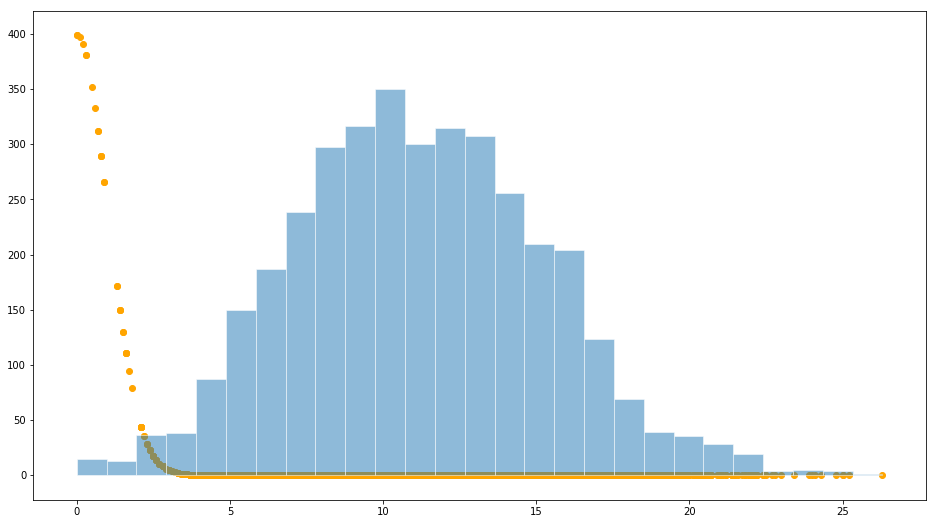

In [26]:
plt.figure(figsize=[16,9])
temp=df['min_temp']
plt.hist(temp,27,edgecolor='white',alpha=.5)
plt.scatter(temp,stat.norm.pdf(temp)*1000,color='orange')
plt.show()

### Task
1. Convert the raw data into z-scores.
2. Then try hist() and pdf() again.
3. Then, cdf().

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

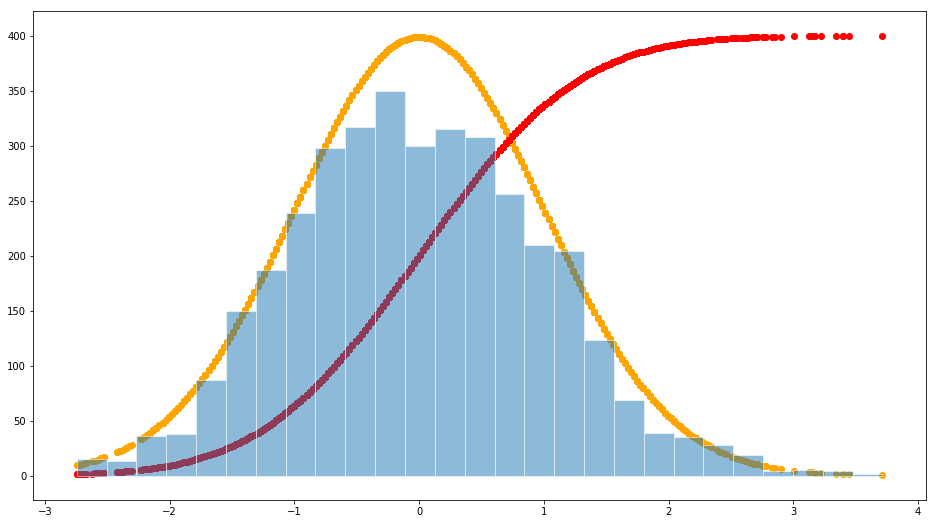

In [27]:
z_score = stat.zscore(temp)
prob = stat.norm.pdf(z_score)
cum_prob = stat.norm.cdf(z_score)

plt.figure(figsize=[16,9])
plt.hist(z_score,27,edgecolor='white',alpha=.5)
plt.scatter(z_score,prob*1000,color='orange')
plt.scatter(z_score,cum_prob*400,color='red')

### Extra
1. Check normality for the 'min_temp'. Is it normally distribution?

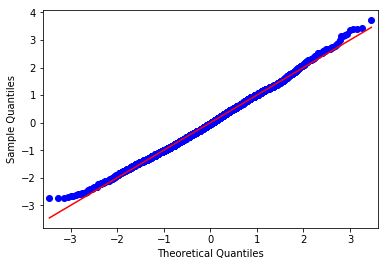

In [28]:
# qqplot
from statsmodels.graphics.gofplots import qqplot
qqplot(z_score,line='s')
plt.show()

In [29]:
# shapiro()
stat_1, p_1=stat.shapiro(z_score)
print("stat_1: %.4f, p_1: %.4f"%(stat_1,p_1))

alpha=0.01
if p_1 > alpha:
    print("It can be said that it is normally distributed.")
else:
    print("Sample does not look Gaussian.")

stat_1: 0.9974, p_1: 0.0000
Sample does not look Gaussian.


In [30]:
# normaltest()
stat_1, p_1=stat.normaltest(z_score)
print("stat_1: %.4f, p_1: %.4f"%(stat_1,p_1))

alpha=0.01
if p_1 > alpha:
    print("It can be said that it is normally distributed.")
else:
    print("Sample does not look Gaussian.")

stat_1: 18.4410, p_1: 0.0001
Sample does not look Gaussian.


### Task
1. Find pop_mean, sample_mean.
2. z for two-tailed at 95% for sample.
3. Plot the pdf of sample.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

##### Expected outcome

pop_mean: 170.01 

sample_mean: 170.78 

z: 1.96

pop_mean: 43.01 
sample_mean: 43.30 
z: 1.96


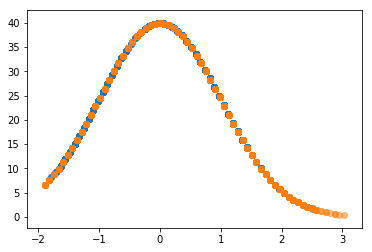

In [31]:
# Given
np.random.seed(41)
population_1 = stat.poisson.rvs(loc=18, mu=35, size=150000)
population_2 = stat.poisson.rvs(loc=18, mu=10, size=100000)
population = np.concatenate((population_1, population_2))
sample = np.random.choice(a= population, size = 3000)

# your code here
pop_mean = population.mean()
sample_mean = sample.mean()

z = stat.norm.ppf(.975)
print("pop_mean: %.2f"%pop_mean,"\nsample_mean: %.2f"%sample_mean,"\nz: %.2f"%z)

z_score_sample = stat.zscore(sample)
z_score_pop = stat.zscore(population)
plt.scatter(z_score_sample,stat.norm.pdf(z_score_sample)*100,alpha=.5)
plt.scatter(z_score_pop,stat.norm.pdf(z_score_pop)*100,alpha=.5)

## Statistical significance

In [32]:
# define probability
p = 0.95
# retrieve value <= probability
value = stat.norm.ppf(p)
print(value)
# confirm with cdf
p = stat.norm.cdf(value)
print(p)

1.6448536269514722
0.95


## Confidence interval
### Task
1. Find the confidence interval of the sample for two-tailed at 95% and 90%.
2. Compare the results.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [33]:
# these are for sample var and stdev
# for population, s.std() and s.var() 
n, min_max, mean, var, skew, kurt = stat.describe(sample)
stdev = math.sqrt(var)
interval_025 = stat.norm.interval(0.025,loc=mean,scale=stdev)
print(interval_025)
interval_05 = stat.norm.interval(0.05,loc=mean,scale=stdev)
print(interval_05)

(42.88591183295422, 43.70542150037912)
(42.47575409695503, 44.11557923637831)
